# Data Cleaning and Transformation Project: UWB Clinical Surveillance Dataset

In this project, I am working with a dataset acquired from an intelligent surveillance system based on Ultra-Wideband (UWB) technology implemented in a hospital setting. This surveillance system is designed to track the movement of patients within the hospital premises, with the aim of improving patient management and optimizing hospital operations.

The dataset includes information collected from UWB tags affixed to patients, including various numerical and categorical attributes related to the timing pulses sent from these tags. This information can be used to determine the patients' locations within the hospital at different points in time.

## Dataset Overview

The dataset consists of 610 rows and 8 columns, representing individual timing pulses sent from an embeded wearable. The attributes in the dataset include the following:

1: **id**: Unique identifier for each record
<br />2: **anchorID**: Identifier for the UWB anchor
<br />3: **tagID**: Identifier for the UWB tag (weareable) affixed to patients
<br />4: **sequenceID**: Sequence number representing the order of the timing pulses
<br />5: **pan**: An attribute whose role and significance will be explored further
<br />6: **processed_flag**: Flag indicating whether the data record has been processed
<br />7: **timestampToA**: Timestamp of the timing pulse
<br />8: **Timestamp ToA**: Another version of the timestamp of the timing pulse

The dataset is expected to be free of missing values, but I will perform a thorough data cleaning and validation process to confirm this and handle any inconsistencies or errors that might be present.

data source: https://archive.ics.uci.edu/dataset/754/dataset+based+on+uwb+for+clinical+establishments

## Project Goals

Our goal in this project is to clean and transform the data so that it can be used for further analysis and modeling. Specifically, I aim to address the following questions and tasks:

<br />1. **Data Integrity and Completeness**: Verify whether there are indeed no missing values in the dataset, and handle any inconsistencies or errors that might be present.

<br />2. **Data Consistency**: Check whether the data types are consistent across the dataset and identify any discrepancies or anomalies in the data.

<br />3. **Data Normalization**: Consider whether it would be beneficial to normalize or standardize the numerical data to prepare the dataset for machine learning algorithms.

<br />4. **Feature Engineering**: Explore the possibility of creating additional features from the existing data, such as the time spent by patients in certain areas of the hospital or the frequency of their movements.

<br />5. **Data Privacy**: Ensure that the dataset does not contain any sensitive information that could compromise patient privacy.

<br />6. **Outlier Detection**: Identify any outliers in the numerical data that should be addressed.

<br />7. **Data Use**: Consider how the cleaned and transformed data might be used in future analyses or models, and ensure that the data is appropriately prepared for these uses.

In the following sections, I will walk through each of these steps in detail, demonstrating the process of cleaning and transforming this unique dataset. I hope that this project will not only serve as a useful example of data cleaning and transformation, but will also contribute to the broader effort to leverage data and technology to improve healthcare outcomes.

### Import libraries

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Load Datasets

In [2]:
# load the datasets
df = pd.read_csv('blink.csv', skiprows=2)


In [3]:
df.columns = ['id', 'anchorID', 'tagID', 'sequenceID', 'pan', 'processed_flag', 'timestampToA', 'Timestamp ToA']
print(df.head())

   id  anchorID     tagID  sequenceID  pan  processed_flag  timestampToA  \
0   2  ANCH0004  TAG00001           0    0               1  7.284800e+11   
1   3  ANCH0002  TAG00001           0    0               1  7.284800e+11   
2   4  ANCH0003  TAG00001           0    0               1  7.284800e+11   
3   5  ANCH0001  TAG00001           1    0               1  7.590540e+11   
4   6  ANCH0004  TAG00001           1    0               1  7.590540e+11   

   Timestamp ToA  
0   728480463235  
1   728480462804  
2   728480463013  
3   759053775951  
4   759053775656  


### 1. Checking Data Integrity and Completeness

In [4]:
# check for missing values
missing_values = df.isnull().sum()

#print the count of missing values for each column
print(missing_values)

id                0
anchorID          0
tagID             0
sequenceID        0
pan               0
processed_flag    0
timestampToA      0
Timestamp ToA     0
dtype: int64


### 2. Checking Data Consistency

In [5]:
# Print the data types of each column
print(df.dtypes)

# Check each column
for col in df.columns:
    try:
        pd.to_numeric(df[col])
        print(f'{col} can be converted to numeric')
    except ValueError:
        print(f'{col} cannot be converted to numeric')


# For each column, print the count of unique values
for col in df.columns:
    print(f"\nColumn Name: {col}")
    print(df[col].value_counts())


id                  int64
anchorID           object
tagID              object
sequenceID          int64
pan                 int64
processed_flag      int64
timestampToA      float64
Timestamp ToA       int64
dtype: object
id can be converted to numeric
anchorID cannot be converted to numeric
tagID cannot be converted to numeric
sequenceID can be converted to numeric
pan can be converted to numeric
processed_flag can be converted to numeric
timestampToA can be converted to numeric
Timestamp ToA can be converted to numeric

Column Name: id
2      1
401    1
403    1
404    1
405    1
      ..
205    1
206    1
207    1
208    1
608    1
Name: id, Length: 607, dtype: int64

Column Name: anchorID
ANCH0004    164
ANCH0002    164
ANCH0003    147
ANCH0001    132
Name: anchorID, dtype: int64

Column Name: tagID
TAG00001    607
Name: tagID, dtype: int64

Column Name: sequenceID
82     4
139    4
135    4
90     4
136    4
      ..
77     3
74     3
72     3
163    3
11     2
Name: sequenceID, L

### 3. Data Normalization

In [6]:
# initialize the scalers
scaler_norm = MinMaxScaler()
scaler_stand = StandardScaler()

# Let's say we want to normalize/standardize the 'timestampToA' column
df['timestampToA_norm'] = scaler_norm.fit_transform(df[['timestampToA']])
df['timestampToA_stand'] = scaler_stand.fit_transform(df[['timestampToA']])

# print the first few rows to see the changes
print(df.head())

   id  anchorID     tagID  sequenceID  pan  processed_flag  timestampToA  \
0   2  ANCH0004  TAG00001           0    0               1  7.284800e+11   
1   3  ANCH0002  TAG00001           0    0               1  7.284800e+11   
2   4  ANCH0003  TAG00001           0    0               1  7.284800e+11   
3   5  ANCH0001  TAG00001           1    0               1  7.590540e+11   
4   6  ANCH0004  TAG00001           1    0               1  7.590540e+11   

   Timestamp ToA  timestampToA_norm  timestampToA_stand  
0   728480463235       7.788921e-08           -0.091135  
1   728480462804       7.788921e-08           -0.091135  
2   728480463013       7.788921e-08           -0.091135  
3   759053775951       8.120406e-08           -0.091135  
4   759053775656       8.120406e-08           -0.091135  


#### Data Visulalize the timestampToA_norm and timestampA_stand

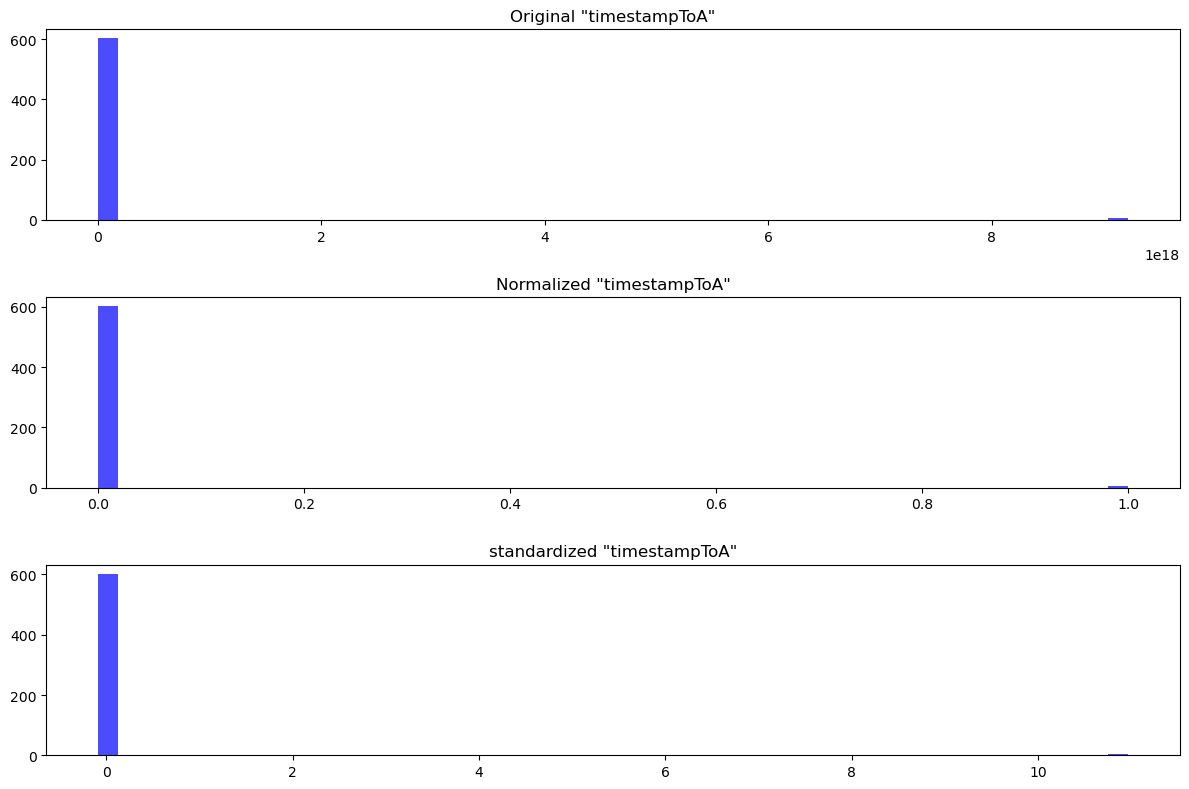

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,8))

ax1.hist(df['timestampToA'], bins=50, color='blue', alpha=0.7)
ax1.set_title('Original "timestampToA"')

ax2.hist(df['timestampToA_norm'], bins=50, color='blue', alpha=0.7)
ax2.set_title('Normalized "timestampToA"')

ax3.hist(df['timestampToA_stand'], bins=50, color='blue', alpha=0.7)
ax3.set_title('standardized "timestampToA"')

plt.tight_layout()
plt.show()

### 4.Featuring Engineering

#### Time Spent by Patients in Certain Areas of the Hospital

The 'anchorID' column represents the location where the signal was captured. The 'timestampToA' column represents the timestamp of arrival. In order to calculate the time spent by each patient('tagID') in each area, I calculate the difference between the minimum and maximum timestamps for each patient in each area

In [8]:
# Group by 'tagID' and 'anchorID', and calculate the minimum and maximum timestamps
df_time = df.groupby(['tagID', 'anchorID'])['timestampToA'].agg(['min', 'max']).reset_index()

# Calculate the time spent in each area by subtracting the minimum timestamp from the maximum
df_time['time_spent'] = df_time['max'] - df_time['min']

# Merge this back to the original dataframe
df = pd.merge(df, df_time, on=['tagID', 'anchorID'])

In [9]:
df.head()

,id,anchorID,tagID,sequenceID,pan,processed_flag,timestampToA,Timestamp ToA,timestampToA_norm,timestampToA_stand,min,max,time_spent
0,2,ANCH0004,TAG00001,0,0,1,7.284800e+11,728480463235,7.788921e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18
1,6,ANCH0004,TAG00001,1,0,1,7.590540e+11,759053775656,8.120406e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18
2,14,ANCH0004,TAG00001,2,0,1,7.735130e+11,773512892177,8.277170e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18
3,15,ANCH0004,TAG00001,3,0,1,7.941370e+11,794136558778,8.500776e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18
4,16,ANCH0004,TAG00001,4,0,1,8.096040e+11,809603984489,8.668470e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18


#### Frequency of Movements

In order to calculate the frequency of movements for each patient, I count the number of unique 'sequenceID' for each 'tagID'. This assumes that each new sequenceID represents a new movement.

In [10]:
# Group by 'tagID' and count the unique 'sequenceID'
df_movement = df.groupby('tagID')['sequenceID'].nunique().reset_index()

# Rename the column to 'movement_frequency'
df_movement.rename(columns={'sequenceID': 'movement_frequency'}, inplace=True)

# Merge this back to the original dataframe
df = pd.merge(df, df_movement, on='tagID')

In [11]:
df.head()

,id,anchorID,tagID,sequenceID,pan,processed_flag,timestampToA,Timestamp ToA,timestampToA_norm,timestampToA_stand,min,max,time_spent,movement_frequency
0,2,ANCH0004,TAG00001,0,0,1,7.284800e+11,728480463235,7.788921e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164
1,6,ANCH0004,TAG00001,1,0,1,7.590540e+11,759053775656,8.120406e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164
2,14,ANCH0004,TAG00001,2,0,1,7.735130e+11,773512892177,8.277170e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164
3,15,ANCH0004,TAG00001,3,0,1,7.941370e+11,794136558778,8.500776e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164
4,16,ANCH0004,TAG00001,4,0,1,8.096040e+11,809603984489,8.668470e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164


#### Average Time Between Movements

This finds the average time that passes between each movement for each tagID, which is helpful for identifying how active each patient is

In [12]:
# First, sort the dataframe by 'tagID' and 'sequenceID'
df.sort_values(['tagID', 'sequenceID'], inplace=True)

# Then, calculate the time difference between each movement for each 'tagID'
df['time_between_movements'] = df.groupby('tagID')['timestampToA'].diff()

# Finally, calculate the average time between movements for each 'tagID'
df_avg_time = df.groupby('tagID')['time_between_movements'].mean().reset_index()

# Merge this back to the original dataframe
df = pd.merge(df, df_avg_time, on='tagID', suffixes=('', '_avg'))


In [13]:
df.info

<bound method DataFrame.info of       id  anchorID     tagID  sequenceID  pan  processed_flag  timestampToA  \
0      2  ANCH0004  TAG00001           0    0               1  7.284800e+11   
1      3  ANCH0002  TAG00001           0    0               1  7.284800e+11   
2      4  ANCH0003  TAG00001           0    0               1  7.284800e+11   
3      6  ANCH0004  TAG00001           1    0               1  7.590540e+11   
4      7  ANCH0002  TAG00001           1    0               1  7.590540e+11   
..   ...       ...       ...         ...  ...             ...           ...   
602  604  ANCH0003  TAG00001         162    0               0  5.167600e+11   
603  601  ANCH0001  TAG00001         162    0               0  5.167600e+11   
604  607  ANCH0004  TAG00001         163    0               0  5.354640e+11   
605  606  ANCH0002  TAG00001         163    0               0  5.354640e+11   
606  608  ANCH0003  TAG00001         163    0               0  5.354640e+11   

     Timestamp ToA 

In [14]:
df.head()

,id,anchorID,tagID,sequenceID,pan,processed_flag,timestampToA,Timestamp ToA,timestampToA_norm,timestampToA_stand,min,max,time_spent,movement_frequency,time_between_movements,time_between_movements_avg
0,2,ANCH0004,TAG00001,0,0,1,7.284800e+11,728480463235,7.788921e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164,NaN,-3.185083e+08
1,3,ANCH0002,TAG00001,0,0,1,7.284800e+11,728480462804,7.788921e-08,-0.091135,1.007898e+10,9.223370e+18,9.223370e+18,164,0.000000e+00,-3.185083e+08
2,4,ANCH0003,TAG00001,0,0,1,7.284800e+11,728480463013,7.788921e-08,-0.091135,1.007895e+10,9.223370e+18,9.223370e+18,164,0.000000e+00,-3.185083e+08
3,6,ANCH0004,TAG00001,1,0,1,7.590540e+11,759053775656,8.120406e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164,3.057400e+10,-3.185083e+08
4,7,ANCH0002,TAG00001,1,0,1,7.590540e+11,759053775204,8.120406e-08,-0.091135,1.007898e+10,9.223370e+18,9.223370e+18,164,0.000000e+00,-3.185083e+08


#### Number of Areas Visited

This finds the number of unique areas ('anchorID') each patient ('tagID') has been in. This could be helpful for understanding how much each patient moves around

In [15]:
# Calculate the number of unique areas visited by each 'tagID'
df_areas = df.groupby('tagID')['anchorID'].nunique().reset_index()

# Rename the column to 'areas_visited'
df_areas.rename(columns={'anchorID': 'areas_visited'}, inplace=True)

# Merge this back to the original dataframe
df = pd.merge(df, df_areas, on='tagID')

In [16]:
df.head()

,id,anchorID,tagID,sequenceID,pan,processed_flag,timestampToA,Timestamp ToA,timestampToA_norm,timestampToA_stand,min,max,time_spent,movement_frequency,time_between_movements,time_between_movements_avg,areas_visited
0,2,ANCH0004,TAG00001,0,0,1,7.284800e+11,728480463235,7.788921e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164,NaN,-3.185083e+08,4
1,3,ANCH0002,TAG00001,0,0,1,7.284800e+11,728480462804,7.788921e-08,-0.091135,1.007898e+10,9.223370e+18,9.223370e+18,164,0.000000e+00,-3.185083e+08,4
2,4,ANCH0003,TAG00001,0,0,1,7.284800e+11,728480463013,7.788921e-08,-0.091135,1.007895e+10,9.223370e+18,9.223370e+18,164,0.000000e+00,-3.185083e+08,4
3,6,ANCH0004,TAG00001,1,0,1,7.590540e+11,759053775656,8.120406e-08,-0.091135,1.007897e+10,9.223370e+18,9.223370e+18,164,3.057400e+10,-3.185083e+08,4
4,7,ANCH0002,TAG00001,1,0,1,7.590540e+11,759053775204,8.120406e-08,-0.091135,1.007898e+10,9.223370e+18,9.223370e+18,164,0.000000e+00,-3.185083e+08,4


### 5, Data Privacy

When dealing with healthcare data, it's important to ensure the privacy of individuals. Data shuld be carefully examined to ensure it does not contain personal identifiable information, like names, addresses, phone numbers, etc which could be used to trace back to an individual. Since this dataset is from a public data forum, so the private data should be cleared out, but it is always professional to check

In [17]:
# Check the data types of each column
print(df.dtypes)

# If any columns have a dtype of 'object', examine those more closely
object_cols = df.select_dtypes(include=['object']).columns

# Print the unique values in each object column
for col in object_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

id                              int64
anchorID                       object
tagID                          object
sequenceID                      int64
pan                             int64
processed_flag                  int64
timestampToA                  float64
Timestamp ToA                   int64
timestampToA_norm             float64
timestampToA_stand            float64
min                           float64
max                           float64
time_spent                    float64
movement_frequency              int64
time_between_movements        float64
time_between_movements_avg    float64
areas_visited                   int64
dtype: object
Unique values in anchorID: ['ANCH0004' 'ANCH0002' 'ANCH0003' 'ANCH0001']
Unique values in tagID: ['TAG00001']


This shows that the data tyoes of each column are as expected, and no columns contain unexpected string data that might be personally identifiable information (PII). The 'achorID' and 'tagID' columns contain categorical values that appear to represent different anchors and tags within the system.

#### 6. Outlier Detection

In [18]:

def detect_outliers(df, timestampToA):
    # Calculate the IQR of the column
    Q1 = df[timestampToA].quantile(0.25)
    Q3 = df[timestampToA].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(df[timestampToA] < lower_bound) | (df[timestampToA] > upper_bound)]

    # Create a boxplot to visualize the outliers
    sns.boxplot(x=df[timestampToA])
    plt.show()

    return outliers

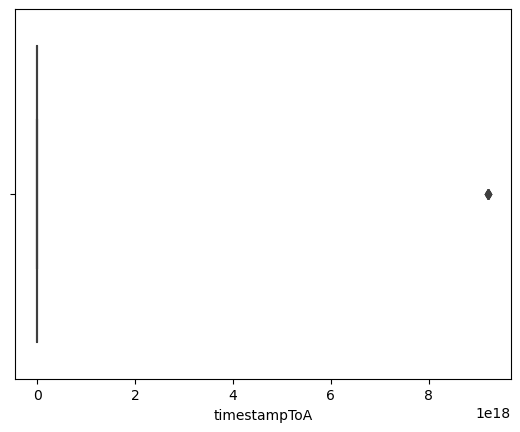

      id  anchorID     tagID  sequenceID  pan  processed_flag  timestampToA  \
51    54  ANCH0004  TAG00001          15    0               1  9.223370e+18   
52    56  ANCH0002  TAG00001          15    0               1  9.223370e+18   
53    55  ANCH0003  TAG00001          15    0               1  9.223370e+18   
199  203  ANCH0004  TAG00001          53    0               1  9.223370e+18   
200  201  ANCH0002  TAG00001          53    0               1  9.223370e+18   

           Timestamp ToA  timestampToA_norm  timestampToA_stand           min  \
51   9223372036854770000                1.0           10.972693  1.007897e+10   
52   9223372036854770000                1.0           10.972693  1.007898e+10   
53   9223372036854770000                1.0           10.972693  1.007895e+10   
199  9223372036854770000                1.0           10.972693  1.007897e+10   
200  9223372036854770000                1.0           10.972693  1.007898e+10   

              max    time_spent  movem

In [19]:
timestampToA = "timestampToA"
outliers = detect_outliers(df, timestampToA)
print(outliers)


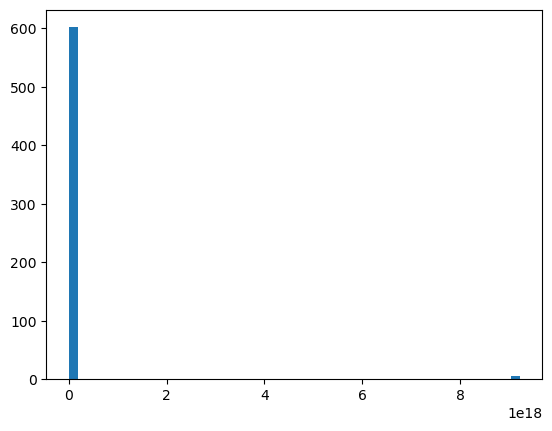

In [24]:
timestampToA = "timestampToA"
plt.hist(df[timestampToA], bins=50)  # Adjust the number of bins as needed
plt.show()


#### 7. Data Use 

The cleaned data can be used for the following future analysis and models

<br> **Model Training**: Machine learning algorithms require clean, preprocessed data. After cleaning and transforming the data, it can be used to train supervised and unsupervised models. For example, the surveillance system dataset might be used to train a model that predicts patient movement patterns in a hospital, while the heart disease dataset might be used to create a predictive model for heart disease based on patient attributes.

<br> **Exploratory Analysis**: The cleaned data can be used for exploratory data analysis (EDA) to understand patterns, spot anomalies, test hypotheses, or check assumptions.

<br> **Feature Engineering**: The transformed data can be used for creating new features that might improve the performance of machine learning models.

<br> **Statistical Testing**: The cleaned data can be used for various statistical tests to understand if certain conditions or features significantly affect the outcome.